In [1]:
using_colab = True

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
if using_colab:
    import torch
    import torchvision
    print("PyTorch version:", torch.__version__)
    print("Torchvision version:", torchvision.__version__)
    print("CUDA is available:", torch.cuda.is_available())
    import sys
    !{sys.executable} -m pip install opencv-python matplotlib
    !{sys.executable} -m pip install 'git+https://github.com/facebookresearch/segment-anything.git'

PyTorch version: 2.1.0+cu121
Torchvision version: 0.16.0+cu121
CUDA is available: True
  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-ub40mc00
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-ub40mc00
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py) ... done


In [4]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2

In [5]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

In [6]:
!wget 'https://www.shutterstock.com/image-photo/creepy-dirty-abandoned-bedroom-cracked-600w-253769623.jpg'

--2024-03-09 23:34:55--  https://www.shutterstock.com/image-photo/creepy-dirty-abandoned-bedroom-cracked-600w-253769623.jpg
Resolving www.shutterstock.com (www.shutterstock.com)... 18.155.68.30, 18.155.68.5, 18.155.68.64, ...
Connecting to www.shutterstock.com (www.shutterstock.com)|18.155.68.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 71398 (70K) [image/jpeg]
Saving to: ‘creepy-dirty-abandoned-bedroom-cracked-600w-253769623.jpg.1’

creepy-dirty-abando 100%[===================>]  69.72K  --.-KB/s    in 0.002s  

2024-03-09 23:34:55 (44.9 MB/s) - ‘creepy-dirty-abandoned-bedroom-cracked-600w-253769623.jpg.1’ saved [71398/71398]



In [7]:
image = cv2.imread('/content/creepy-dirty-abandoned-bedroom-cracked-600w-253769623.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

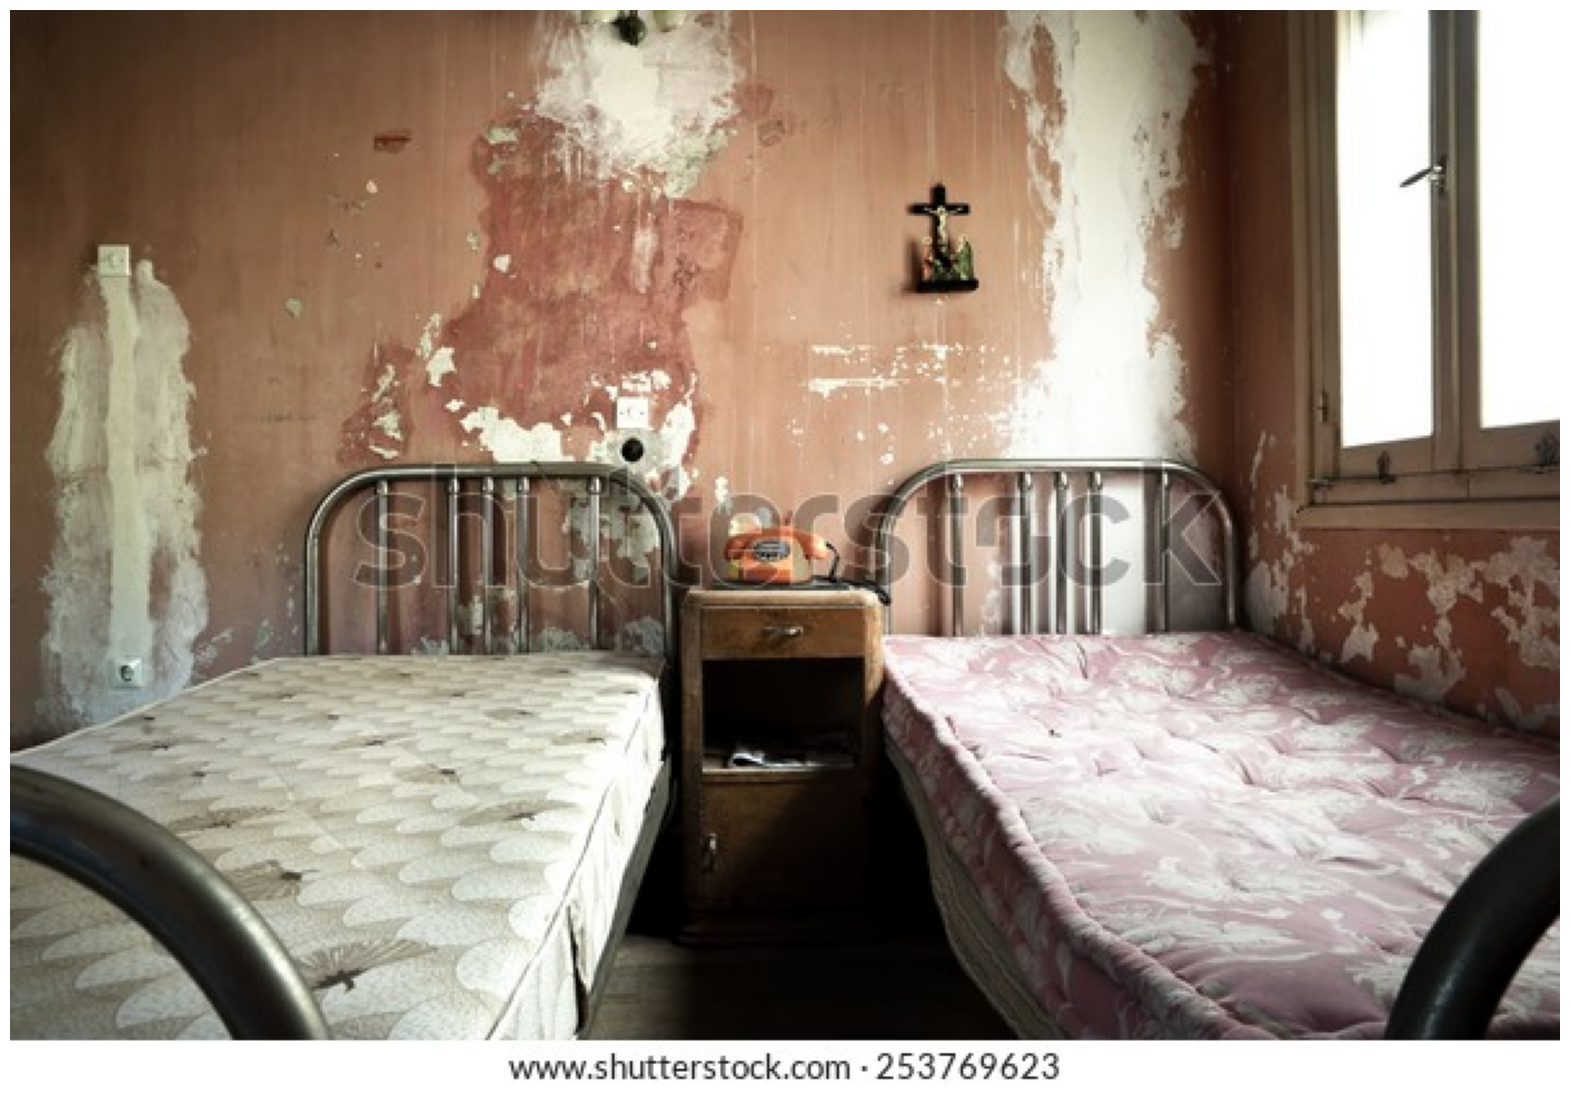

In [8]:
plt.figure(figsize=(20,20))
plt.imshow(image)
plt.axis('off')
plt.show()

## Automatic mask generation

In [9]:
!nvidia-smi

Sat Mar  9 23:34:56 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   60C    P8              10W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [10]:
import sys
sys.path.append("..")
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

sam_checkpoint = "/content/drive/MyDrive/sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cuda"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

mask_generator = SamAutomaticMaskGenerator(sam)

In [11]:
masks = mask_generator.generate(image)

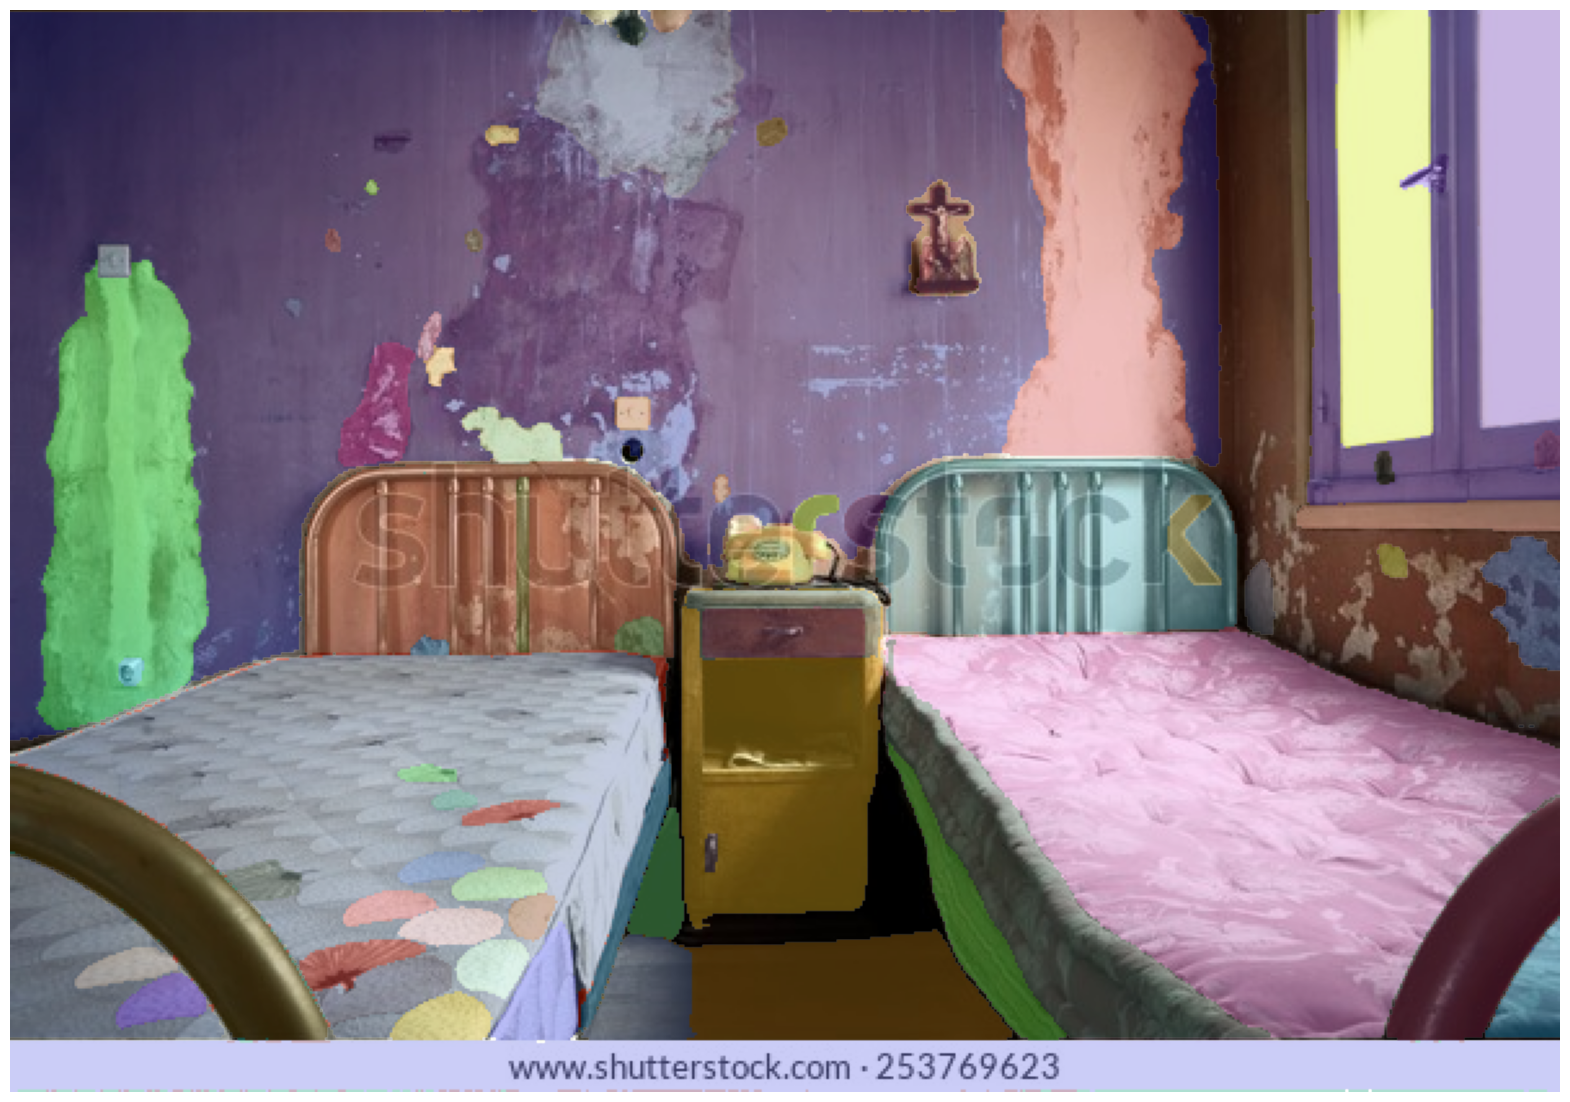

In [12]:
plt.figure(figsize=(20,20))
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.show()

In [13]:
image = cv2.imread('/content/room-sorry-bad-quality.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

error: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [ ]:
masks = mask_generator.generate(image)

In [ ]:
plt.figure(figsize=(20,20))
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.show()

In [14]:
!pip install gradio_client transformers pyngrok fastapi[all] nest_asyncio -q
!curl -s https://ngrok-agent.s3.amazonaws.com/ngrok.asc | sudo tee /etc/apt/trusted.gpg.d/ngrok.asc >/dev/null && echo "deb https://ngrok-agent.s3.amazonaws.com buster main" | sudo tee /etc/apt/sources.list.d/ngrok.list && sudo apt update && sudo apt install ngrok
!ngrok authtoken 2NqtkyBMF0KF99ofEU1fGz1pCJS_3XehxpoU47JGBiqY6tV7M

from fastapi import FastAPI, UploadFile, File
from fastapi.middleware.cors import CORSMiddleware
import os
from pyngrok import ngrok
import nest_asyncio
import uvicorn
port=8888
app = FastAPI()
app.add_middleware(
CORSMiddleware,
allow_origins=["*"],
allow_credentials=True,
allow_methods=["*"],
allow_headers=["*"],
)

deb https://ngrok-agent.s3.amazonaws.com buster main
Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:6 https://ngrok-agent.s3.amazonaws.com buster InRelease
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
40 packages can be upgraded. Run 'apt list --upgradabl

In [15]:
from tempfile import NamedTemporaryFile

In [ ]:
# from fastapi.responses import Response, FileResponse
# @app.post("/predictor2/")
# async def predict(file: UploadFile = File(...)):

#   with NamedTemporaryFile(delete=False) as temp_file:
#     temp_file.write(await file.read())
#     temp_file_path = temp_file.name

#   image = cv2.imread(temp_file_path)
#   image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#   masks = mask_generator.generate(image)
#   os.remove(temp_file_path)
#   plt.figure(figsize=(20,20))
#   plt.imshow(image)
#   show_anns(masks)
#   plt.axis('off')
#   plt.savefig('temp.png', bbox_inches='tight', pad_inches=0)
#   return FileResponse("temp.png")

In [16]:
!pip install cloudinary

In [17]:
import cloudinary
import cloudinary.uploader

In [18]:
cloudinary.config(
    cloud_name="dcwwcwkvu",
    api_key="363672271215785",
    api_secret="Oba71bEe-7fmwIgjugIe3qDZsDY"
)
def upload_to_cloudinary(image_path):
    try:
        # Upload image to Cloudinary
        upload_result = cloudinary.uploader.upload(image_path)

        # Access the URL of the uploaded image
        image_url = upload_result["url"]

        return image_url
    except Exception as e:
        print(f"Error uploading image to Cloudinary: {e}")
        return None

In [19]:
from fastapi.responses import Response, FileResponse
from fastapi.responses import JSONResponse
@app.post("/predictor2/")
async def predict(file: UploadFile = File(...)):

  with NamedTemporaryFile(delete=False) as temp_file:
    temp_file.write(await file.read())
    temp_file_path = temp_file.name

  image = cv2.imread(temp_file_path)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  masks = mask_generator.generate(image)
  os.remove(temp_file_path)
  plt.figure(figsize=(20,20))
  plt.imshow(image)
  show_anns(masks)
  plt.axis('off')
  plt.savefig('temp.png', bbox_inches='tight', pad_inches=0)
  uploaded_url = upload_to_cloudinary('temp.png')
  if uploaded_url:
        return JSONResponse(content={"image_url": uploaded_url}, status_code=200)
  else:
        return JSONResponse(content={"error": "Failed to upload image"}, status_code=500)

In [ ]:
if __name__=="__main__":
    ngrok_tunnel = ngrok.connect(port)
    print('Public URL:', ngrok_tunnel.public_url)
    nest_asyncio.apply()
    uvicorn.run(app,port=port)

INFO:     Started server process [5545]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8888 (Press CTRL+C to quit)


Public URL: https://e6bb-34-143-233-30.ngrok-free.app
INFO:     49.32.133.90:0 - "POST /predictor2/ HTTP/1.1" 200 OK
INFO:     2401:4900:198e:28ea:1:2:de79:95b0:0 - "GET /predictor2/ HTTP/1.1" 405 Method Not Allowed
INFO:     2409:4040:d01:6baf:1dcc:1054:ff66:fa01:0 - "POST /predictor2/ HTTP/1.1" 500 Internal Server Error


ERROR:    Exception in ASGI application
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/uvicorn/protocols/http/httptools_impl.py", line 412, in run_asgi
    result = await app(  # type: ignore[func-returns-value]
  File "/usr/local/lib/python3.10/dist-packages/uvicorn/middleware/proxy_headers.py", line 69, in __call__
    return await self.app(scope, receive, send)
  File "/usr/local/lib/python3.10/dist-packages/fastapi/applications.py", line 1054, in __call__
    await super().__call__(scope, receive, send)
  File "/usr/local/lib/python3.10/dist-packages/starlette/applications.py", line 123, in __call__
    await self.middleware_stack(scope, receive, send)
  File "/usr/local/lib/python3.10/dist-packages/starlette/middleware/errors.py", line 186, in __call__
    raise exc
  File "/usr/local/lib/python3.10/dist-packages/starlette/middleware/errors.py", line 164, in __call__
    await self.app(scope, receive, _send)
  File "/usr/local/lib/python3.10/dis

INFO:     2409:4040:d01:6baf:1dcc:1054:ff66:fa01:0 - "POST /predictor2/ HTTP/1.1" 200 OK
INFO:     2409:4040:d01:6baf:1dcc:1054:ff66:fa01:0 - "POST /predictor2/ HTTP/1.1" 200 OK
INFO:     2409:4040:d01:6baf:1dcc:1054:ff66:fa01:0 - "POST /predictor2/ HTTP/1.1" 200 OK
INFO:     2409:4040:d01:6baf:1dcc:1054:ff66:fa01:0 - "POST /predictor2/ HTTP/1.1" 200 OK
INFO:     2409:4040:d01:6baf:1dcc:1054:ff66:fa01:0 - "POST /predictor2/ HTTP/1.1" 200 OK
INFO:     2409:4040:d01:6baf:1dcc:1054:ff66:fa01:0 - "POST /predictor2/ HTTP/1.1" 422 Unprocessable Entity
INFO:     2409:4040:d01:6baf:1dcc:1054:ff66:fa01:0 - "POST /predictor2/ HTTP/1.1" 422 Unprocessable Entity
INFO:     2409:4040:d01:6baf:1dcc:1054:ff66:fa01:0 - "POST /predictor2/ HTTP/1.1" 200 OK
INFO:     2409:4040:d01:6baf:1dcc:1054:ff66:fa01:0 - "POST /predictor2/ HTTP/1.1" 200 OK
INFO:     2409:4040:d01:6baf:1dcc:1054:ff66:fa01:0 - "POST /predictor2/ HTTP/1.1" 200 OK
INFO:     2409:4040:d01:6baf:35eb:aae1:c289:81d8:0 - "GET / HTTP/1.1" 404 